In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [3]:
House_data=pd.read_csv(r"C:\Users\FAITH\Documents\work\AI\data\archive\housing.csv")

In [4]:
House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
House_data.shape

(20640, 10)

In [6]:
House_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
House_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#checking missing values
House_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
House_data['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [11]:
#theres a difference between empty cell and nan... if cell is empty, Imputer wont work
#Handling the empty cell in total bedrrom that prevents it from having a skew value.....
#we'll have use an imputer (i.e from sklearn.impute import SimpleImputer) to fill the missing values if it is 'NaN' values to fill but it is an empty cell

value='nan'
result=House_data[House_data['total_bedrooms']==value]
print(result)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [12]:
#fill empty cells with fillna()
x=House_data['total_bedrooms'].median()
House_data['total_bedrooms'].fillna(x,inplace=True)

In [13]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
House_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
#for numerical correlation,copy the original data and drop categorical data
numeric_House_data=House_data.copy()

In [16]:
numeric_House_data.drop(['ocean_proximity'],axis=1,inplace=True)

In [17]:
numeric_House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


longitude
-0.29777956498586855
latitude
0.46591914016270397
housing_median_age
0.06032625301661101
total_rooms
4.147042038773343
total_bedrooms
3.480887868105638
population
4.93549950885852
households
3.4101898550856307
median_income
1.64653702990008
median_house_value
0.9776922140978416


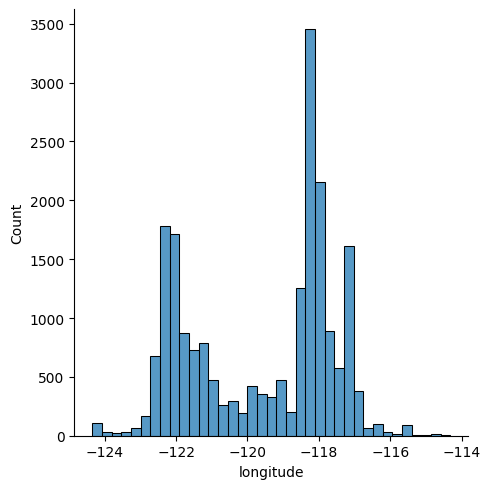

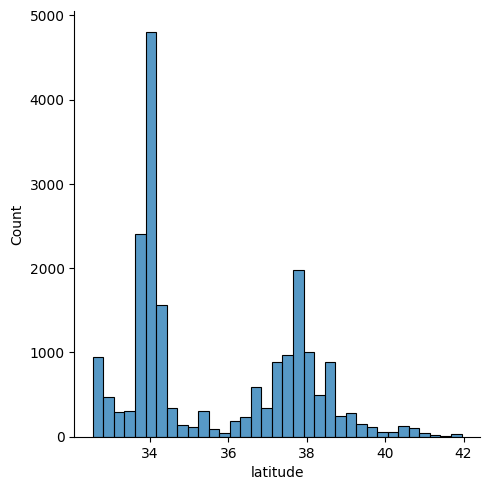

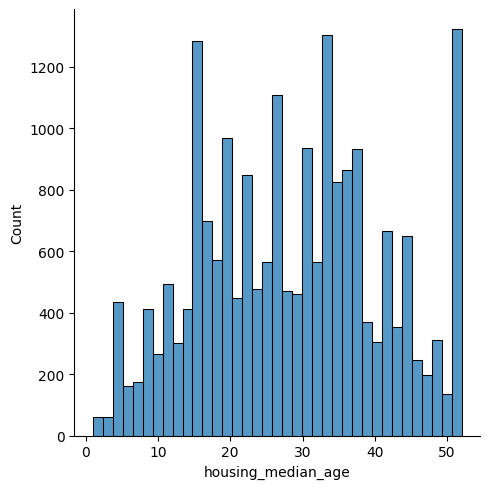

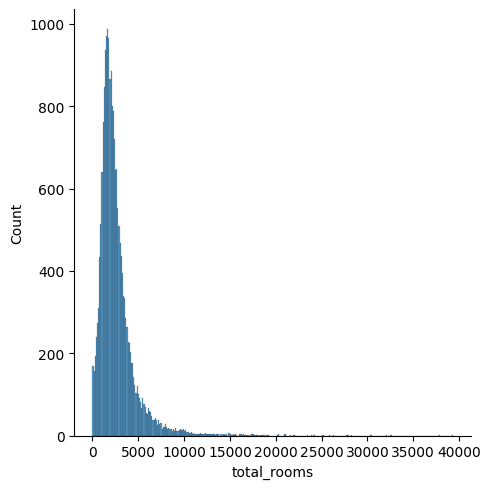

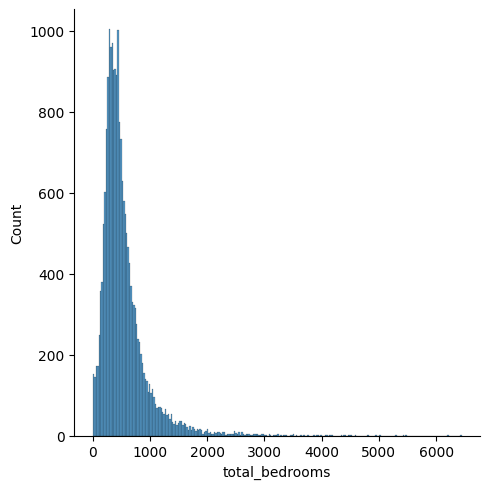

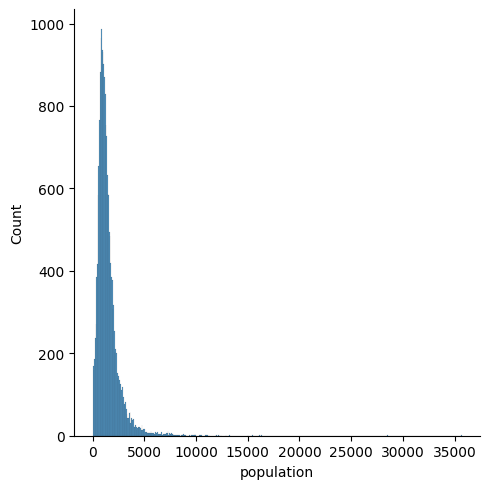

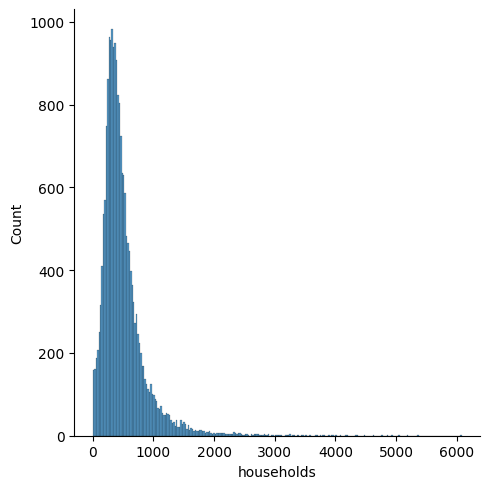

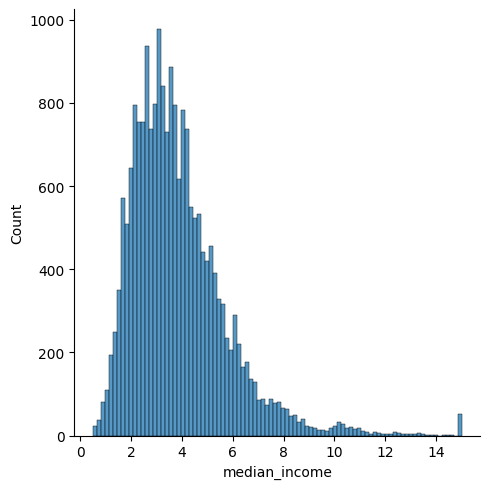

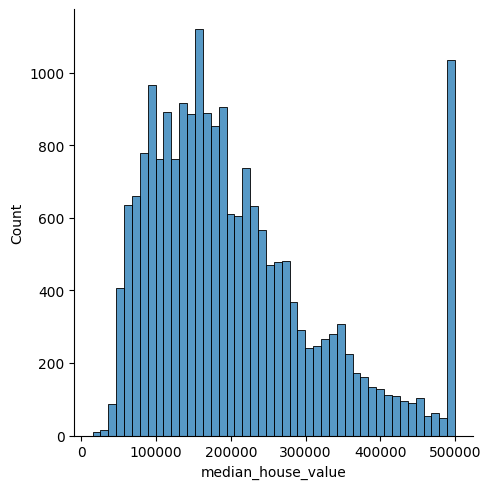

In [18]:
#investigating the distribution of numeric data
for col in numeric_House_data:
    print(col)
    print(skew(numeric_House_data[col]))
    plt.figure
    sns.displot(numeric_House_data[col])
    plt.show

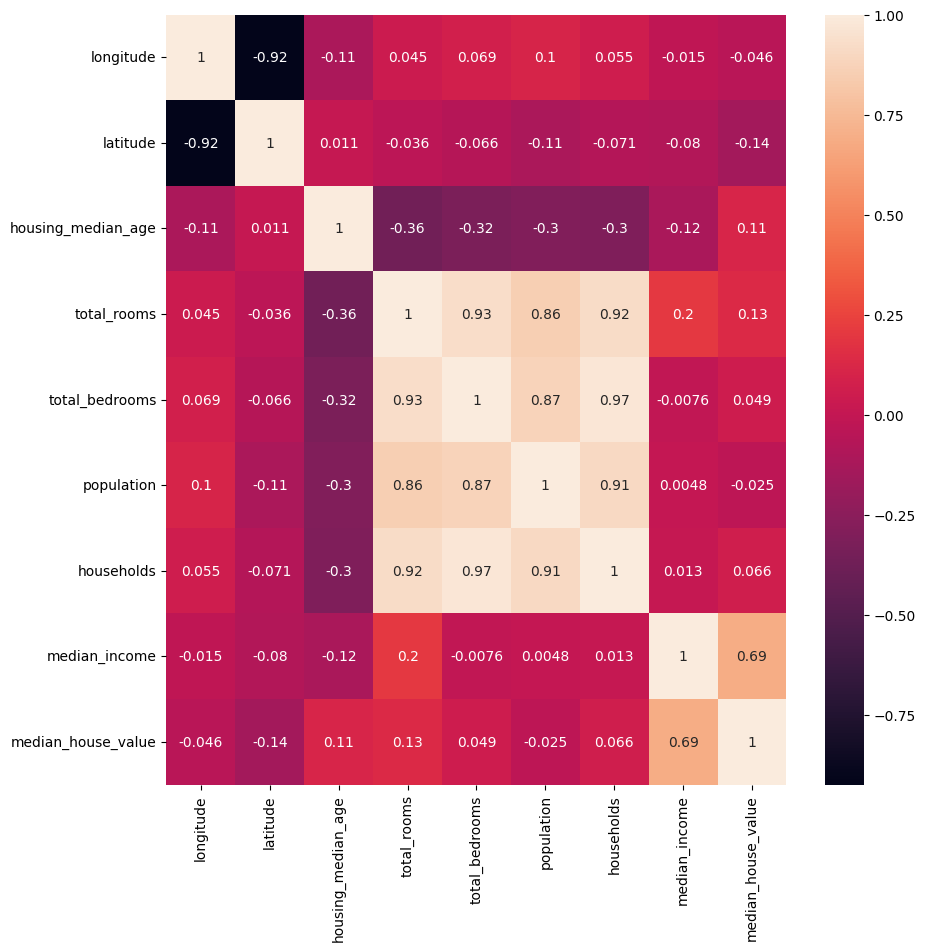

In [19]:
#correlation heatmap

fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(numeric_House_data.corr(), annot=True)
plt.show()

In [20]:
#adjusting skewness
House_data['latitude']=(House_data['latitude']**1/4)
House_data['latitude'].skew()

0.46595300370997006

In [21]:
#adjusting skewness
House_data['total_rooms']=(House_data['total_rooms']**1/2)


In [22]:
House_data['total_rooms'].skew()

4.147343450632158

In [23]:
#adjusting skewness
House_data['median_income']=(House_data['median_income']**1/4)
House_data['median_income'].skew()

1.6466567021344465

In [24]:
#Encoding ocean proximity(categorical data)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ocean_proximity_encoded = pd.DataFrame(encoder.fit_transform(
    House_data[['ocean_proximity']]).toarray())

updated_House_data = House_data.join(ocean_proximity_encoded)

updated_House_data.rename(columns = {0:'NEAR BAY',1:'1H OCEAN',2:'INLAND',3:'NEAR OCEAN',4:'ISLAND'}, inplace = True)
updated_House_data.reset_index(inplace = True)

In [25]:
updated_House_data.drop(columns = {'index'}, inplace = True)
updated_House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,9.4700,41.0,440.0,129.0,322.0,126.0,2.081300,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,9.4650,21.0,3549.5,1106.0,2401.0,1138.0,2.075350,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,9.4625,52.0,733.5,190.0,496.0,177.0,1.814350,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,9.4625,52.0,637.0,235.0,558.0,219.0,1.410775,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,9.4625,52.0,813.5,280.0,565.0,259.0,0.961550,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [26]:
updated_House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,9.4700,41.0,440.0,129.0,322.0,126.0,2.081300,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,9.4650,21.0,3549.5,1106.0,2401.0,1138.0,2.075350,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,9.4625,52.0,733.5,190.0,496.0,177.0,1.814350,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,9.4625,52.0,637.0,235.0,558.0,219.0,1.410775,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,9.4625,52.0,813.5,280.0,565.0,259.0,0.961550,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [27]:
updated_House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,9.4700,41.0,440.0,129.0,322.0,126.0,2.081300,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,9.4650,21.0,3549.5,1106.0,2401.0,1138.0,2.075350,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,9.4625,52.0,733.5,190.0,496.0,177.0,1.814350,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,9.4625,52.0,637.0,235.0,558.0,219.0,1.410775,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,9.4625,52.0,813.5,280.0,565.0,259.0,0.961550,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [28]:
#splitting data into predictants(X) and target(y)
X=updated_House_data.drop(columns='median_house_value',axis=1)
Y=updated_House_data['median_house_value']

In [29]:
#Seperating data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
#get your train data by joining Xtrain with Y train
train_data=X_train.join(Y_train)

In [31]:
#feature engineering i.e- adding descripture features with common characteristics
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_room']=train_data['total_rooms']/train_data['households']

In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value,bedroom_ratio,household_room
20404,-118.87,8.5525,26.0,2219.5,616.0,1881.0,592.0,1.573375,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,258000.0,0.277540,3.749155
19100,-122.61,9.5650,17.0,1432.0,487.0,1482.0,547.0,1.170825,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,215200.0,0.340084,2.617916
4485,-118.20,8.5150,40.0,590.5,335.0,1441.0,337.0,0.528400,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,111800.0,0.567316,1.752226
4567,-118.26,8.5150,38.0,357.5,282.0,1174.0,300.0,0.586250,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,225000.0,0.788811,1.191667
7920,-118.07,8.4650,28.0,894.5,352.0,1347.0,330.0,0.856250,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,189700.0,0.393516,2.710606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,-118.26,8.5325,25.0,1604.0,1111.0,2843.0,1005.0,0.666825,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,218100.0,0.692643,1.596020
18627,-121.96,9.2750,20.0,461.0,155.0,361.0,135.0,1.590425,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,331500.0,0.336226,3.414815
3983,-118.63,8.5450,32.0,823.0,242.0,697.0,233.0,1.667225,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,433000.0,0.294046,3.532189
557,-122.23,9.4400,52.0,1505.5,542.0,1303.0,535.0,1.275975,NEAR BAY,0.0,0.0,0.0,1.0,0.0,273800.0,0.360013,2.814019


In [33]:
train_data.drop(columns='ocean_proximity',axis=1,inplace=True)

In [34]:
#spllitthe train data back to xtrain and y train
X_train,Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [35]:
#Do same or the test data
#get your test data by joining Xtrain with Y train
test_data=X_test.join(Y_test)

In [36]:
#feature engineering i.e- adding descripture features with common characteristics
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_room']=test_data['total_rooms']/test_data['households']

In [37]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value,bedroom_ratio,household_room
3617,-118.43,8.5625,32.0,1216.5,553.0,2318.0,532.0,0.909600,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,159300.0,0.454583,2.286654
12848,-121.38,9.6725,35.0,1471.5,554.0,1460.0,510.0,0.667825,INLAND,0.0,1.0,0.0,0.0,0.0,84400.0,0.376487,2.885294
3211,-119.66,9.0850,32.0,669.0,276.0,859.0,286.0,0.659925,INLAND,0.0,1.0,0.0,0.0,0.0,59700.0,0.412556,2.339161
19564,-120.94,9.4025,13.0,1654.5,603.0,1796.0,555.0,0.959300,INLAND,0.0,1.0,0.0,0.0,0.0,129300.0,0.364461,2.981081
10491,-117.68,8.3775,19.0,1465.0,428.0,1481.0,430.0,1.580750,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,480800.0,0.292150,3.406977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,-120.44,9.3275,21.0,3455.5,1341.0,3967.0,1297.0,0.762875,INLAND,0.0,1.0,0.0,0.0,0.0,95200.0,0.388077,2.664225
312,-122.19,9.4425,41.0,1018.0,510.0,1412.0,454.0,0.511725,NEAR BAY,0.0,0.0,0.0,1.0,0.0,89300.0,0.500982,2.242291
8932,-118.48,8.5000,25.0,2074.5,1067.0,1749.0,1000.0,0.993050,<1H OCEAN,1.0,0.0,0.0,0.0,0.0,450000.0,0.514341,2.074500
2241,-119.81,9.2075,10.0,2890.0,922.0,2712.0,883.0,1.411125,INLAND,0.0,1.0,0.0,0.0,0.0,135500.0,0.319031,3.272933


In [38]:
test_data.drop(columns='ocean_proximity',axis=1,inplace=True)

In [39]:
#spllitthe test data back to xtest and y test
X_test,Y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [40]:
#The result is processed and thereby scaling the inputs
#we reprocess and thereby scaling the inputs
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train_s=scaler.fit_transform(X_train)

In [43]:
X_test_s=scaler.transform(X_test)

In [44]:
#intializing the regression model
model=LinearRegression()

In [45]:
#Training the Linear Regression with training data
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
model.score(X_test,Y_test)

0.6543247682375921

In [47]:
model.fit(X_train_s,Y_train)

LinearRegression()

In [48]:
#The scaled xtest may perorm better......
model.score(X_test_s,Y_test)

0.6543376126438127

In [49]:
#Importing GridsearchCV for best model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [50]:
forest=RandomForestRegressor()

In [51]:
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
forest.score(X_test,Y_test)

0.8279130862368798

In [53]:
#use the scaled data to see improvements
forest.fit(X_train_s,Y_train)

RandomForestRegressor()

In [54]:
forest.score(X_test_s,Y_test)

0.8288403482346047

In [55]:
#further processing to get the best values use grid search
from sklearn.model_selection import GridSearchCV

In [56]:
forest=RandomForestRegressor()
params_grid={'n_estimators': [3, 10, 30],
             'max_features':[2,4,6,8]}
gridSearch=GridSearchCV(forest,params_grid,cv=10,scoring='neg_mean_squared_error',
                        return_train_score=True)

gridSearch.fit(X_train_s,Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
bestForest=gridSearch.best_estimator_

In [58]:
bestForest.score(X_test_s,Y_test)

0.8239876108642255

In [59]:
#we want to use a loop to find best estimators by create a new numeric variable and a function that takes multiple algorithm
#create new variable name
New_X=X.copy()

In [60]:
New_X.drop(columns='ocean_proximity',axis=1,inplace=True)
New_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,9.4700,41.0,440.0,129.0,322.0,126.0,2.081300,0.0,0.0,0.0,1.0,0.0
1,-122.22,9.4650,21.0,3549.5,1106.0,2401.0,1138.0,2.075350,0.0,0.0,0.0,1.0,0.0
2,-122.24,9.4625,52.0,733.5,190.0,496.0,177.0,1.814350,0.0,0.0,0.0,1.0,0.0
3,-122.25,9.4625,52.0,637.0,235.0,558.0,219.0,1.410775,0.0,0.0,0.0,1.0,0.0
4,-122.25,9.4625,52.0,813.5,280.0,565.0,259.0,0.961550,0.0,0.0,0.0,1.0,0.0


In [61]:
#we want to use a loop to find best estimators by create a new numeric variable and a function that takes multiple algorithm
#create new variable name
New_Y=Y.copy()

In [62]:
#Seperating data into train and test
New_X_train,New_X_test,New_Y_train,New_Y_test=train_test_split(New_X,New_Y,test_size=0.2)

In [63]:
#use gridsearch library imported above
#for selecting the best model
def best_model_selection(New_X,New_Y):
    models = {
        'Decision Tree Regression' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}
        },
        'Ridge Regression' : {
            'model' : Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 10.0]}
        },
        'Lasso Regression' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
            }
        },
        'Random Forest Regressor ' : {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [10, 20, 30]
            }
        },
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    for model_name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(New_X,New_Y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [64]:
best_model_selection(New_X_train,New_Y_train)

,model,best_score,best_params
0,Decision Tree Regression,0.665124,"{'max_depth': None, 'max_features': 'log2', 'm..."
1,Ridge Regression,0.639088,{'alpha': 1.0}
2,Lasso Regression,0.639065,{'alpha': 10.0}
3,Random Forest Regressor,0.809715,{'n_estimators': 30}


In [65]:
#intializing the regression model
model=LinearRegression()

In [66]:
forest=RandomForestRegressor()

In [67]:
#Building all the best models
best_linear = LinearRegression().fit(New_X_train, New_Y_train)
best_lasso = Lasso(alpha = 1).fit(New_X_train, New_Y_train)
best_ridge = Ridge(alpha = 10).fit(New_X_train, New_Y_train)
best_tree = DecisionTreeRegressor(max_depth = 10, max_features = 'sqrt', min_samples_leaf = 4,min_samples_split = 10).fit(New_X_train, New_Y_train)
best_forest = RandomForestRegressor(n_estimators = 40).fit(New_X_train, New_Y_train)

In [68]:
#Y_pred for all the models
y_pred_linear = best_linear.predict(New_X_test)
y_pred_lasso = best_lasso.predict(New_X_test)
y_pred_ridge = best_ridge.predict(New_X_test)
y_pred_tree = best_tree.predict(New_X_test)
y_pred_forest = best_forest.predict(New_X_test)

In [69]:
#Evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [70]:
#Mean Absolute Error
mae_linear = mae(New_Y_test,y_pred_linear)
mae_lasso = mae(New_Y_test,y_pred_lasso)
mae_ridge = mae(New_Y_test,y_pred_ridge)
mae_tree = mae(New_Y_test,y_pred_tree)
mae_forest = mae(New_Y_test,y_pred_forest)

In [71]:
#Mean Squared Error
mse_linear = mse(New_Y_test,y_pred_linear)
mse_lasso = mse(New_Y_test,y_pred_lasso)
mse_ridge = mse(New_Y_test,y_pred_ridge)
mse_dc = mse(New_Y_test,y_pred_tree)
mse_rfr = mse(New_Y_test,y_pred_forest)

In [72]:
#Coefficient of determination
r2_linear = r2_score(New_Y_test,y_pred_linear)
r2_lasso = r2_score(New_Y_test,y_pred_lasso)
r2_ridge = r2_score(New_Y_test,y_pred_ridge)
r2_tree = r2_score(New_Y_test,y_pred_tree)
r2_forest = r2_score(New_Y_test,y_pred_forest)

In [73]:
#--Evaluation Metrics df
eval_result = pd.DataFrame({'MAE':[mae_linear,mae_lasso,mae_ridge,mae_tree,mae_forest], 
                        'MSE':[mse_linear,mse_lasso,mse_ridge,mae_tree,mae_forest],
                       'R2 Score' : [r2_linear,r2_lasso,r2_ridge,mae_tree,mae_forest], 
                    'Model': ['Linear Regression','Lasso Regression','Ridge Regression','Decision Trees','Random Forest']})
eval_result.head()

,MAE,MSE,R2 Score,Model
0,48995.771146,4.674933e+09,0.641585,Linear Regression
1,48997.947075,4.675532e+09,0.641539,Lasso Regression
2,49034.675049,4.688625e+09,0.640535,Ridge Regression
3,46882.622110,4.688262e+04,46882.622110,Decision Trees
4,31926.513384,3.192651e+04,31926.513384,Random Forest


In [72]:
#since the MAE ,and MSE of the Random forest is lowest, it is very good for predicting the model
#The R2 score seems so high probably because of the hypertunning...redefine parameters